### K-means clustering algorithm to group customers of a retail store based on their purchase history.

# Importing the libraries

In [1]:
##basic libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

## model
from sklearn.cluster import KMeans

import os
import warnings
warnings.filterwarnings('ignore')

In [4]:
for dirname, _, filenames in os.walk(r'C:\Users\Satoshi\Desktop\Data\prodigy-2'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\Satoshi\Desktop\Data\prodigy-2\customers-clustering-with-k-means-and-dbscan.ipynb
C:\Users\Satoshi\Desktop\Data\prodigy-2\Mall_Customers.csv
C:\Users\Satoshi\Desktop\Data\prodigy-2\.ipynb_checkpoints\customers-clustering-with-k-means-and-dbscan-checkpoint.ipynb


# Load and Prepare Data

In [3]:
Market_Basket = pd.read_csv(r'C:\Users\Satoshi\Desktop\Data\prodigy-2Mall_Customers.csv')

In [4]:
Market_Basket.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# EDA

In [5]:
Market_Basket.shape

(200, 5)

In [6]:
Market_Basket.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
Market_Basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
Market_Basket.Gender.value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [9]:
Market_Basket.Age.min()

18

In [10]:
Market_Basket[Market_Basket['Age']==18]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
33,34,Male,18,33,92
65,66,Male,18,48,59
91,92,Male,18,59,41
114,115,Female,18,65,48


In [11]:
Market_Basket.Age.max()

70

In [12]:
Market_Basket[Market_Basket['Age']==70]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
60,61,Male,70,46,56
70,71,Male,70,49,55


In [13]:
Market_Basket['Annual Income (k$)'].min()

15

In [14]:
Market_Basket[Market_Basket['Annual Income (k$)']==15]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [15]:
Market_Basket['Annual Income (k$)'].max()

137

In [16]:
Market_Basket[Market_Basket['Annual Income (k$)']==137]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


# Visualization

In [17]:
sns.set_theme(style="ticks", color_codes=True)
sns.color_palette("rocket")

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

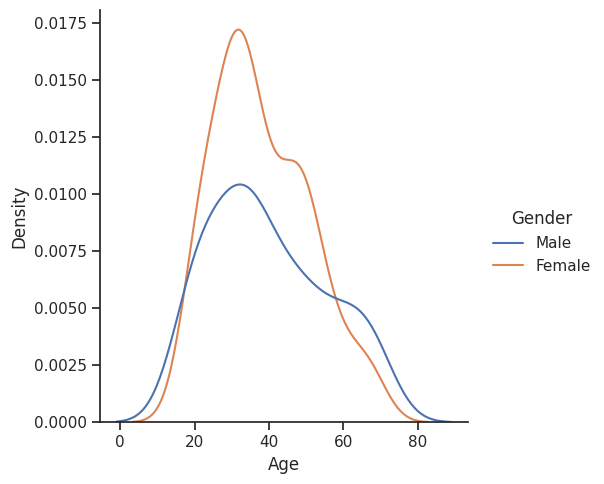

In [18]:
sns.displot(Market_Basket, x = 'Age',hue='Gender', kind='kde')

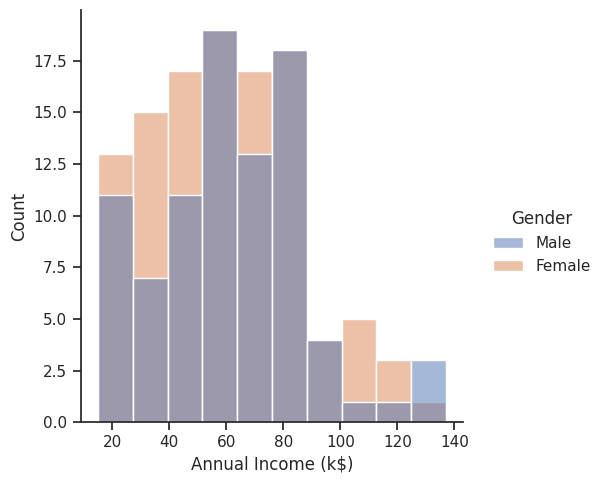

In [19]:
sns.displot(Market_Basket, x = 'Annual Income (k$)',hue='Gender', kind='hist')

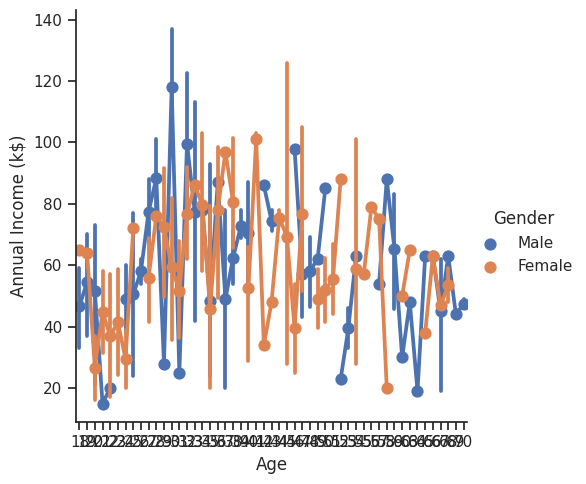

In [20]:
sns.catplot(x = 'Age', y='Annual Income (k$)', hue='Gender',kind='point', data=Market_Basket)

# Data Preprocessing

In [21]:
Market_Basket.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Label Encoding

In [22]:
Market_Basket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [23]:
laencoder = LabelEncoder()
Market_Basket['Gender'] = laencoder.fit_transform(Market_Basket['Gender'])

### Standard Scaler

In [24]:
X = Market_Basket.drop(['CustomerID'], axis=1)

In [25]:
SC = StandardScaler()
MarkBas_X = SC.fit_transform(X)

# Train the Model 

## KMeans Model

In this model, we have considered 6 states and obtained the number of clusters and the clustering model.

### 1. Using Gender and Spending Score

In [26]:
MarkBas_X_1 = MarkBas_X[:,[0,3]]


wcss_1 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    #k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.
    kmeans.fit(MarkBas_X_1)
    wcss_1.append(kmeans.inertia_)

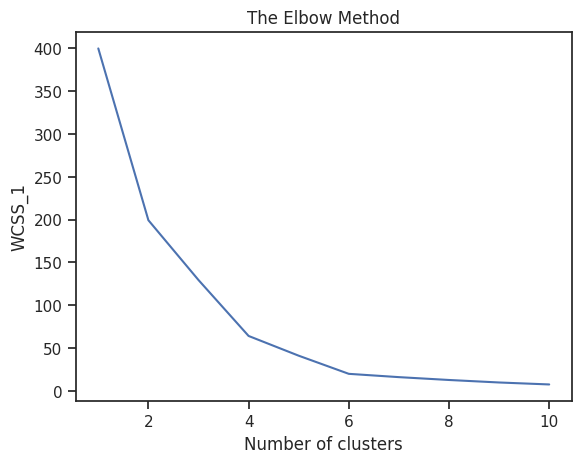

In [27]:
plt.plot(range(1, 11), wcss_1)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS_1')
plt.show()

In [28]:
kmeans_1 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans_1 = kmeans_1.fit_predict(MarkBas_X_1)

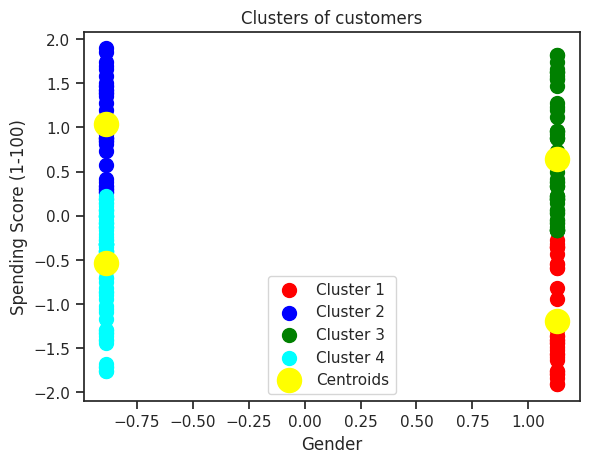

In [29]:
plt.scatter(MarkBas_X_1[y_kmeans_1 == 0, 0], MarkBas_X_1[y_kmeans_1 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(MarkBas_X_1[y_kmeans_1 == 1, 0], MarkBas_X_1[y_kmeans_1 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(MarkBas_X_1[y_kmeans_1 == 2, 0], MarkBas_X_1[y_kmeans_1 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(MarkBas_X_1[y_kmeans_1 == 3, 0], MarkBas_X_1[y_kmeans_1 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans_1.cluster_centers_[:, 0], kmeans_1.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Gender')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### 2. Using Age and Spending Score

In [30]:
MarkBas_X_2 = MarkBas_X[:,[1,3]]

wcss_2 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    #k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.
    kmeans.fit(MarkBas_X_2)
    wcss_2.append(kmeans.inertia_)

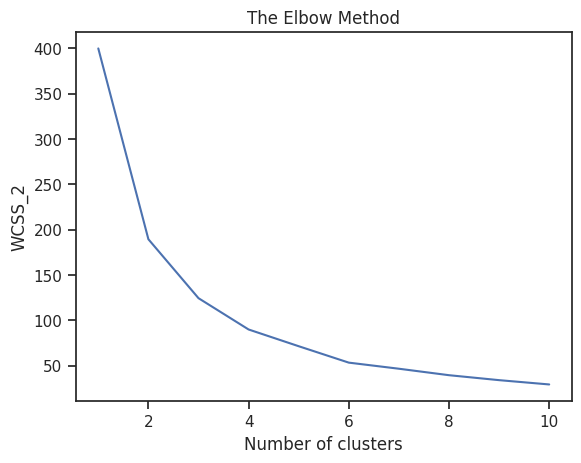

In [31]:
plt.plot(range(1, 11), wcss_2)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS_2')
plt.show()

In [32]:
kmeans_2 = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans_2 = kmeans_2.fit_predict(MarkBas_X_2)

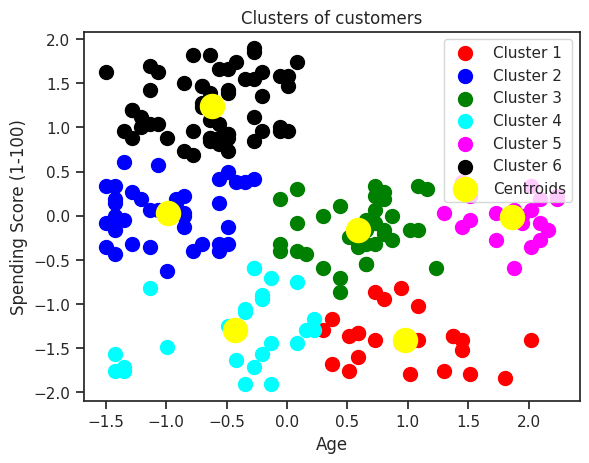

In [33]:
plt.scatter(MarkBas_X_2[y_kmeans_2 == 0, 0], MarkBas_X_2[y_kmeans_2 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(MarkBas_X_2[y_kmeans_2 == 1, 0], MarkBas_X_2[y_kmeans_2 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(MarkBas_X_2[y_kmeans_2 == 2, 0], MarkBas_X_2[y_kmeans_2 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(MarkBas_X_2[y_kmeans_2 == 3, 0], MarkBas_X_2[y_kmeans_2 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(MarkBas_X_2[y_kmeans_2 == 4, 0], MarkBas_X_2[y_kmeans_2 == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(MarkBas_X_2[y_kmeans_2 == 5, 0], MarkBas_X_2[y_kmeans_2 == 5, 1], s = 100, c = 'black', label = 'Cluster 6')
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### 3. Using Annual Income and Spending Score

In [34]:
MarkBas_X_3 = MarkBas_X[:,[2,3]]


wcss_3 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    #k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.
    kmeans.fit(MarkBas_X_3)
    wcss_3.append(kmeans.inertia_)

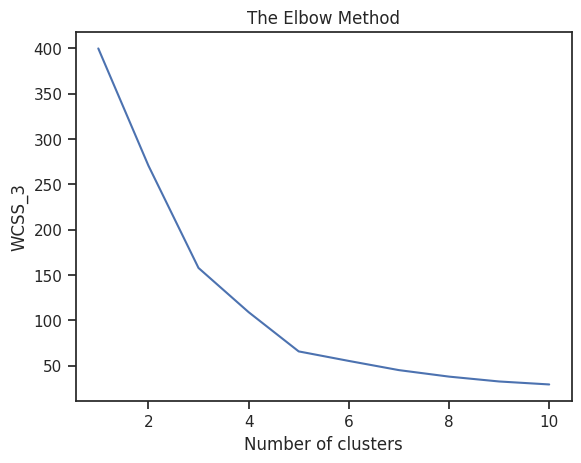

In [35]:
plt.plot(range(1, 11), wcss_3)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS_3')
plt.show()

In [36]:
kmeans_3 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans_3 = kmeans_3.fit_predict(MarkBas_X_3)

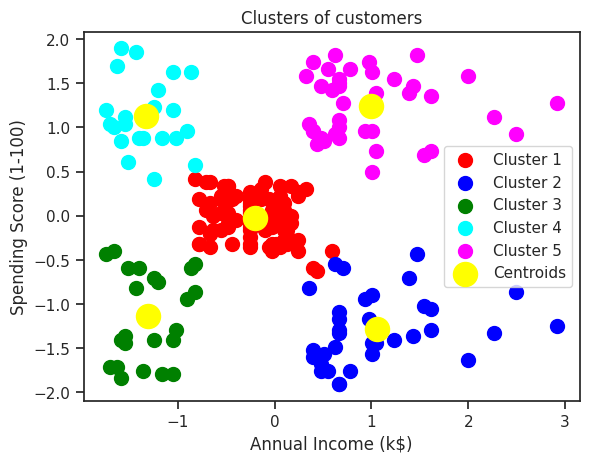

In [37]:
plt.scatter(MarkBas_X_3[y_kmeans_3 == 0, 0], MarkBas_X_3[y_kmeans_3 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(MarkBas_X_3[y_kmeans_3 == 1, 0], MarkBas_X_3[y_kmeans_3 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(MarkBas_X_3[y_kmeans_3 == 2, 0], MarkBas_X_3[y_kmeans_3 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(MarkBas_X_3[y_kmeans_3 == 3, 0], MarkBas_X_3[y_kmeans_3 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(MarkBas_X_3[y_kmeans_3 == 4, 0], MarkBas_X_3[y_kmeans_3 == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### 4. Using Gender and Annual Income and Spending Score

In [38]:
MarkBas_X_4 = MarkBas_X[:,[0,2,3]]


wcss_4 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    #k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.
    kmeans.fit(MarkBas_X_4)
    wcss_4.append(kmeans.inertia_)

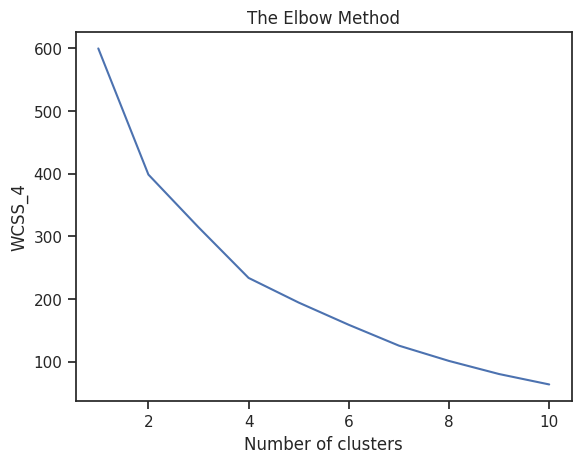

In [39]:
plt.plot(range(1, 11), wcss_4)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS_4')
plt.show()

In [40]:
kmeans_4 = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans_4 = kmeans_4.fit_predict(MarkBas_X_4)

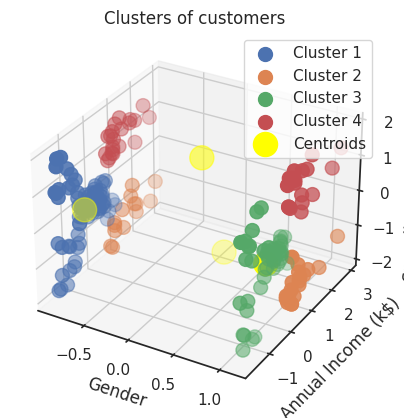

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the clusters
for i in range(4):
    ax.scatter(MarkBas_X_4[y_kmeans_4 == i, 0], MarkBas_X_4[y_kmeans_4 == i, 1], MarkBas_X_4[y_kmeans_4 == i, 2], s=100, label=f'Cluster {i + 1}')

# Plotting the centroids
ax.scatter(kmeans_4.cluster_centers_[:, 0], kmeans_4.cluster_centers_[:, 1], kmeans_4.cluster_centers_[:, 2],
           s=300, c='yellow', label='Centroids')

ax.set_title('Clusters of customers')
ax.set_xlabel('Gender')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()

plt.show()

### 5. Using Gender and Age and Spending Score

In [42]:
MarkBas_X_5 = MarkBas_X[:,[0,1,3]]


wcss_5 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    #k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.
    kmeans.fit(MarkBas_X_5)
    wcss_5.append(kmeans.inertia_)

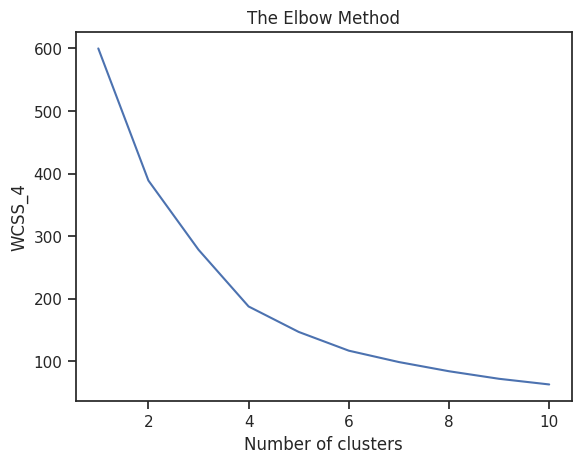

In [43]:
plt.plot(range(1, 11), wcss_5)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS_4')
plt.show()

In [44]:
kmeans_5 = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans_5 = kmeans_5.fit_predict(MarkBas_X_5)

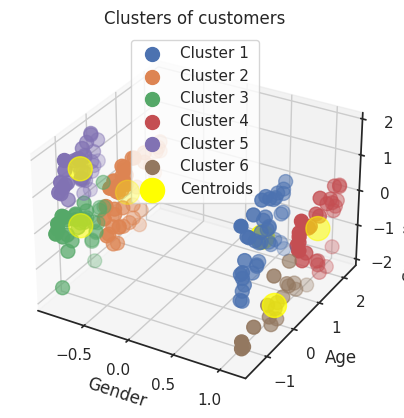

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the clusters
for i in range(6):
    ax.scatter(MarkBas_X_5[y_kmeans_5 == i, 0], MarkBas_X_5[y_kmeans_5 == i, 1], MarkBas_X_5[y_kmeans_5 == i, 2], s=100, label=f'Cluster {i + 1}')

# Plotting the centroids
ax.scatter(kmeans_5.cluster_centers_[:, 0], kmeans_5.cluster_centers_[:, 1], kmeans_5.cluster_centers_[:, 2],
           s=300, c='yellow', label='Centroids')

ax.set_title('Clusters of customers')
ax.set_xlabel('Gender')
ax.set_ylabel('Age')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()

plt.show()

### 6. Using Age and Annual Income and Spending Score

In [46]:
MarkBas_X_6 = MarkBas_X[:,[1,2,3]]


wcss_6 = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    #k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.
    kmeans.fit(MarkBas_X_6)
    wcss_6.append(kmeans.inertia_)

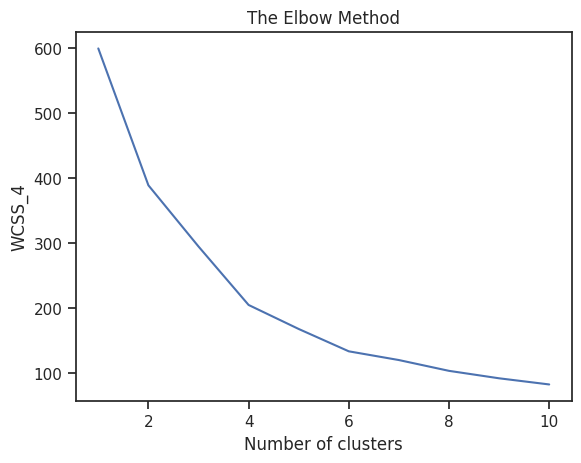

In [47]:
plt.plot(range(1, 11), wcss_6)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS_4')
plt.show()

In [48]:
kmeans_6 = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans_6 = kmeans_6.fit_predict(MarkBas_X_6)

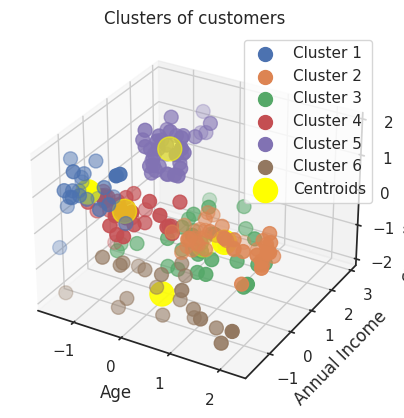

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the clusters
for i in range(6):
    ax.scatter(MarkBas_X_6[y_kmeans_6 == i, 0], MarkBas_X_6[y_kmeans_6 == i, 1], MarkBas_X_6[y_kmeans_6 == i, 2], s=100, label=f'Cluster {i + 1}')

# Plotting the centroids
ax.scatter(kmeans_6.cluster_centers_[:, 0], kmeans_6.cluster_centers_[:, 1], kmeans_6.cluster_centers_[:, 2],
           s=300, c='yellow', label='Centroids')

ax.set_title('Clusters of customers')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()

plt.show()